In [2]:
import torch
import torchvision
from torchvision import datasets,transforms

In [1]:
from torch.utils.tensorboard import SummaryWriter

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline


## Define dataset and dataloader 

In [108]:
img_transforms = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((0.1307,), (0.3081,))
])

In [109]:
trainset = datasets.MNIST('../data/', train=True, transform=img_transforms, download=True)
testset = datasets.MNIST('../data/', train=False, transform=img_transforms, download =True)

## Some facts about the data

In [110]:
trainset.data.shape, testset.data.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [111]:
trainset.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [112]:
trainset.targets.shape

torch.Size([60000])

In [113]:
for i in range(10): 
    print(i, (trainset.targets == i).sum().item())

0 5923
1 6742
2 5958
3 6131
4 5842
5 5421
6 5918
7 6265
8 5851
9 5949


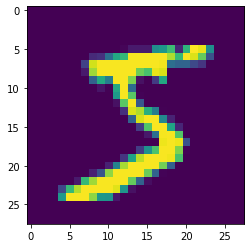

In [114]:
plt.imshow(trainset.data[0])

In [115]:
from torch.utils.data import DataLoader

In [116]:
num_epochs = 1
batch_size = 128
learning_rate = 1e-3

In [117]:
train_dataloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)

## Define model, loss function

In [118]:
import torch.nn as nn

In [119]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.Encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(True),
            nn.Linear(128, 64), 
            nn.ReLU(True), 
            nn.Linear(64, 12),
            nn.ReLU(True), 
            nn.Linear(12, 3)
        )
        self.Decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(True),
            nn.Linear(12, 64), 
            nn.ReLU(True), 
            nn.Linear(64, 128),
            nn.ReLU(True), 
            nn.Linear(128, 28*28),
            nn.Tanh()
        )
        
    def forward(self, x):
        x = self.Encoder(x)
        x = self.Decoder(x)
        return x
    

In [120]:
model = AutoEncoder().cuda()

In [121]:
criterion = nn.MSELoss()

In [122]:
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)

## Training Code

In [147]:
num_epochs=50

In [148]:
model.train()
for epoch in range(num_epochs): 
    for data in train_dataloader: 
        img, _ = data
        img = img.view(img.size(0), -1)
        img = img.cuda()
        # forward 
        output = model(img)
        loss = criterion(output, img)
        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print('epoch [{}/{}], loss:{:.4f}'
            .format(epoch + 1, num_epochs, loss.item()))
    if epoch+1%10 == 0: 
        torch.save(model.state_dict(), '../models/mnist_autoencoder_epoch{}.pth'.format(epoch+1))

epoch [1/50], loss:0.4934
epoch [2/50], loss:0.4866
epoch [3/50], loss:0.5048
epoch [4/50], loss:0.5117
epoch [5/50], loss:0.4749
epoch [6/50], loss:0.5258
epoch [7/50], loss:0.5161
epoch [8/50], loss:0.5340
epoch [9/50], loss:0.4951
epoch [10/50], loss:0.4943
epoch [11/50], loss:0.5117
epoch [12/50], loss:0.5092
epoch [13/50], loss:0.4827
epoch [14/50], loss:0.4814
epoch [15/50], loss:0.5135
epoch [16/50], loss:0.5024
epoch [17/50], loss:0.4529
epoch [18/50], loss:0.4746
epoch [19/50], loss:0.4491
epoch [20/50], loss:0.4949
epoch [21/50], loss:0.4769
epoch [22/50], loss:0.4840
epoch [23/50], loss:0.4910
epoch [24/50], loss:0.4798
epoch [25/50], loss:0.4941
epoch [26/50], loss:0.4775
epoch [27/50], loss:0.4966
epoch [28/50], loss:0.4583
epoch [29/50], loss:0.4612
epoch [30/50], loss:0.4963
epoch [31/50], loss:0.4585


KeyboardInterrupt: 

In [ ]:
pic = output.cpu().data

In [ ]:
for i in range(10):
    plt.figure()
    plt.imshow((pic*.5 + .5).view(-1,28,28)[i].numpy())

##### 